<a href="https://colab.research.google.com/github/nupur1262/trying_face_detection/blob/master/Prediction%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DOWNLOADING THE .pkl File


In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-27 13:43:35--  https://docs.google.com/uc?export=download&confirm=&id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.113, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-as-docs.googleusercontent.com/docs/securesc/64mn2ulu1qvs6bt5kl1rg2obs12c68ud/7qh5rn7kmafoiq2t005ikg1j37fnj5vv/1598535750000/00180827297015777168/08678932799850278259Z/1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl?e=download [following]
--2020-08-27 13:43:36--  https://doc-10-as-docs.googleusercontent.com/docs/securesc/64mn2ulu1qvs6bt5kl1rg2obs12c68ud/7qh5rn7kmafoiq2t005ikg1j37fnj5vv/1598535750000/00180827297015777168/08678932799850278259Z/1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl?e=download
Resolving doc-10-as-docs.googleusercontent.com (doc-10-as-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to 

##IMPORTING REQUIRED LIBRARIES

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [3]:
predictor = load_learner('/content/')

#TAKING INPUT OF THE IMAGE LINK TO BE PREDICTED

In [22]:
url = input("Enter URL\n")
!wget -O "sample.jpg" {url}

Enter URL
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTEhSnd2lwD-aqcZYApAjXk6yJFOp2ArJ7IzQ&usqp=CAU
--2020-08-27 14:02:29--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTEhSnd2lwD-aqcZYApAjXk6yJFOp2ArJ7IzQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.28.102, 74.125.28.101, 74.125.28.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.28.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6935 (6.8K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]   6.77K  --.-KB/s    in 0s      

2020-08-27 14:02:29 (74.8 MB/s) - ‘sample.jpg’ saved [6935/6935]



##RESIZING THE IMAGE

In [23]:
import cv2 

image = cv2.imread("/content/sample.jpg", 1)
pic = cv2.resize(image, (244,244))
img = cv2.imwrite('output.jpg' , pic)

##FACE CROPPER FUNCTION

In [ ]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

In [ ]:
import dlib
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [34]:
img = face_finder("/content/sample.jpg")

In [55]:
pic1 = pic.save("face.jpg")

In [36]:
def my_predictor(pic):
  test_img =open_image(pic)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

not_me


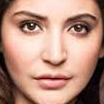

In [57]:
print(my_predictor('/content/face.jpg'))
img = open_image("/content/face.jpg")
img

#UPLOAD PHOTO FROM SYSTEM

In [58]:
from google.colab import files
my_file=files.upload()

Saving sample.jpg.jpeg to sample.jpg.jpeg


In [60]:
import cv2 

image = cv2.imread("/content/sample.jpg", 1) 
pic = cv2.resize(image, (244,244))
img = cv2.imwrite('output.jpg' , pic)

In [6]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2020-08-27 13:56:06--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2020-08-27 13:56:07 (12.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [7]:
import dlib
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [61]:
img = face_finder("/content/sample.jpg")

In [62]:
pic = img[0]
pic1 = pic.save("Face.jpg")
pic1

In [64]:
def my_predictor(pic):
  test_img =open_image(pic)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

me


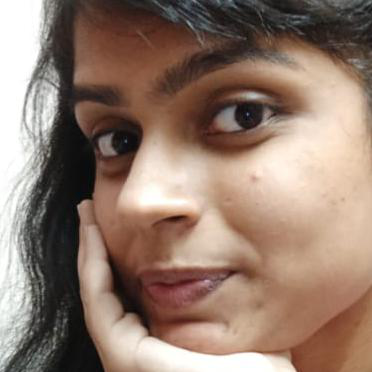

In [65]:
print(my_predictor('/content/Face.jpg'))
img = open_image("/content/Face.jpg")
img